In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Spambase dataset
data = pd.read_csv('spam.csv.csv')


In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


import numpy as np
from google.colab import autoviz
df_4330401157904165715 = autoviz.get_df('df_4330401157904165715')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4330401157904165715, *['v1'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4330401157904165715 = autoviz.get_df('df_4330401157904165715')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4330401157904165715, *['v2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4330401157904165715 = autoviz.get_df('df_4330401157904165715')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_4330401157904165715, *['v1', 'v2'], **{})
chart

In [6]:
# Drop the columns with NaN values
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)


In [7]:
data.columns = ['label', 'text']


In [8]:
print(data.head())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [9]:
# Separate features (X) and target labels (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [12]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()


In [13]:
# Fit and transform the training data (X_train)
X_train_vectorized = vectorizer.fit_transform(X_train['text'])

# Transform the test data (X_test)
X_test_vectorized = vectorizer.transform(X_test['text'])


In [15]:
# Train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)


MultinomialNB()

In [17]:
# Make predictions on the test data
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.98
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



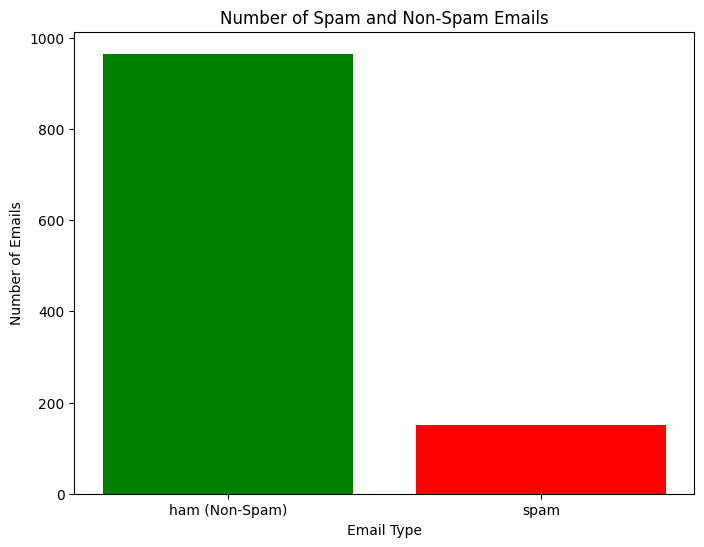

In [19]:
import matplotlib.pyplot as plt

# Count the number of spam and non-spam emails in the test set
spam_counts = y_test.value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index, spam_counts.values, color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Number of Spam and Non-Spam Emails')
plt.xticks([0, 1], ['ham (Non-Spam)', 'spam'])
plt.show()
